# Faizan ul Haq
## ML Task

Project Domain / Category
Data Science/Machine Learning
Abstract / Introduction
Email becomes a powerful tool for communication as it saves a lot of time and cost. It is one of the
most popular and secure medium for online transferring and communication messages or data
through the web. But, due to the social networks, most of the emails contain unwanted information
which is called spam. To identify such spam email is one of the important challenges.
In this project we will use PYTHON text classification technique to identify or classify email spam
message. We will find accuracy, time and error rate by applying suitable algorithms (such as
NaiveBayes, NaiveBayesMultinomial and J48 etc.) on Email Dataset and we will also compare which
algorithm is best for text classification.
Functional Requirements:
Administrator will perform all these tasks.
1. Collect Data Set
• Gathering the data for Email spam contains spam and non-spam messages

2. Pre-processing
• As most of the data in the real world are incomplete containing noisy and missing values.
Therefore we have to apply Pre-processing on your data.
3. Feature Selection
• After the pre-processing step, we apply the feature selection algorithm, the algorithm
which deploy here is Best First Feature Selection algorithm.
4. Apply Spam Filter Algorithms.
• Handle Data: Load the dataset and split it into training and test datasets.
• Summarize Data: summarize the properties in the training dataset so that we can
calculate probabilities and make predictions.
• Make a Prediction: Use the summaries of the dataset to generate a single prediction.
• Make Predictions: Generate predictions given a test dataset and a summarized training
dataset.
• Evaluate Accuracy: Evaluate the accuracy of predictions made for a test dataset as the
percentage correct out of all predictions made.
5. Train & Test Data
• Split data into 70% training & 30% testing data sets.
6. Confusion Matrix
• Create a confusion matrix table to describe the performance of a classification model.
7. Accuracy
• Find Accuracy of all algorithm and compare.

## PREPROCESSING

In [1]:
#Libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
email_df = pd.read_csv("E:\Faizan\EziLine\Task0\spam.csv" , encoding="latin-1")     #file reading 

In [3]:
email_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
email_df.shape      #3 extra useless columns

(5572, 5)

In [5]:
email_df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
email_df.info()     #not much information in the 3 4 5th columns so i will drop them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
email_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
drop_col = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
email_df.drop(drop_col , axis=1 , inplace=True)

In [9]:
email_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
email_df.drop_duplicates(inplace = True)  

In [11]:
email_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
email_df.rename(columns = {'v1':'label' , 'v2':'mail'} , inplace = True)

In [13]:
email_df.head()

,label,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#find unique values in label column
email_df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
email_df['label'] = enc.fit_transform(email_df['label'])        #converting ham and spam into 0 and 1

In [16]:
email_df.head()

,label,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## EDA


In [17]:
# import nltk
# nltk.download()

In [18]:
#for the analysis of data i shall be looking at the length of the mail
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize

In [19]:
x = "this is a sentence"
word_tokenize(x)

['this', 'is', 'a', 'sentence']

In [20]:
email_df['word_count'] = email_df['mail'].apply(lambda y: len(word_tokenize(y)))        #tokenizes each sentence and then counts the number of words in each sentence

In [21]:
email_df.head()

,label,mail,word_count
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [22]:
email_df['char_count'] = email_df['mail'].apply(lambda y: len(y.replace(" ","")))      #counts the number of characters in each sentence

In [23]:
email_df.head()

,label,mail,word_count,char_count
0,0,"Go until jurong point, crazy.. Available only ...",24,92
1,0,Ok lar... Joking wif u oni...,8,24
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,128
3,0,U dun say so early hor... U c already then say...,13,39
4,0,"Nah I don't think he goes to usf, he lives aro...",15,49


In [24]:
email_df[email_df['label']==0]

,label,mail,word_count,char_count
0,0,"Go until jurong point, crazy.. Available only ...",24,92
1,0,Ok lar... Joking wif u oni...,8,24
3,0,U dun say so early hor... U c already then say...,13,39
4,0,"Nah I don't think he goes to usf, he lives aro...",15,49
6,0,Even my brother is not like to speak with me. ...,18,62
...,...,...,...,...
5565,0,Huh y lei...,4,10
5568,0,Will Ì_ b going to esplanade fr home?,9,30
5569,0,"Pity, * was in mood for that. So...any other s...",15,48
5570,0,The guy did some bitching but I acted like i'd...,27,100


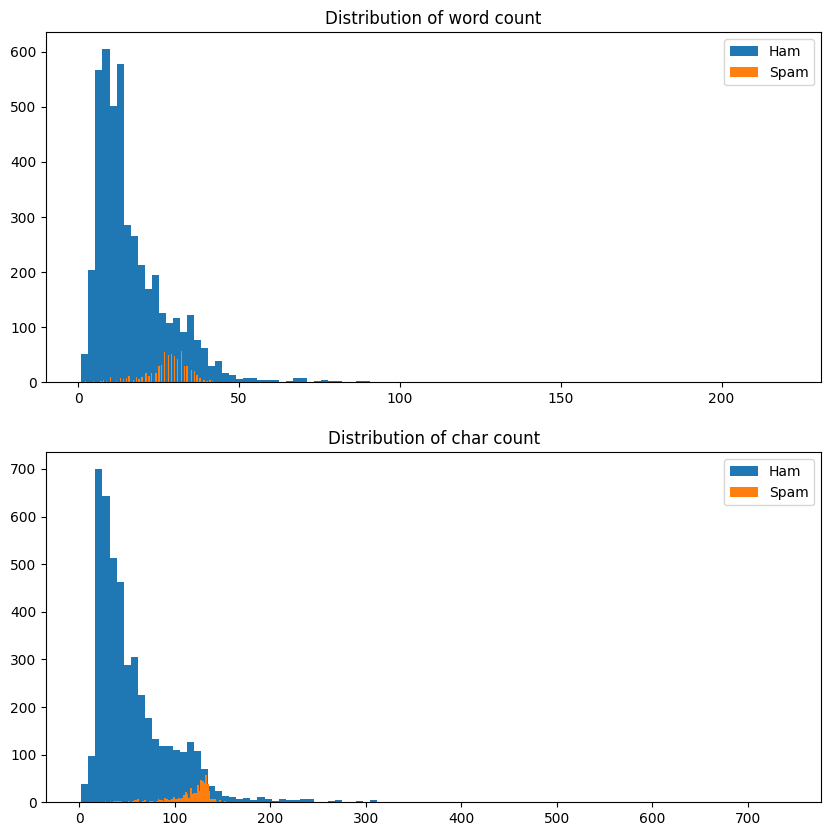

In [25]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("Distribution of word count")
plt.hist(email_df[email_df['label']==0]['word_count'],bins=100,label='Ham')         #selecting the ham rows only and then selecting the word_count column
plt.hist(email_df[email_df['label']==1]['word_count'],bins=100,label='Spam')
plt.legend()
plt.subplot(2,1,2)
plt.title("Distribution of char count")
plt.hist(email_df[email_df['label']==0]['char_count'],bins=100,label='Ham')
plt.hist(email_df[email_df['label']==1]['char_count'],bins=100,label='Spam')
plt.legend()
plt.show()


we can see that the spam messages are not only shorter sentences but also use less amount of characters


<AxesSubplot: >

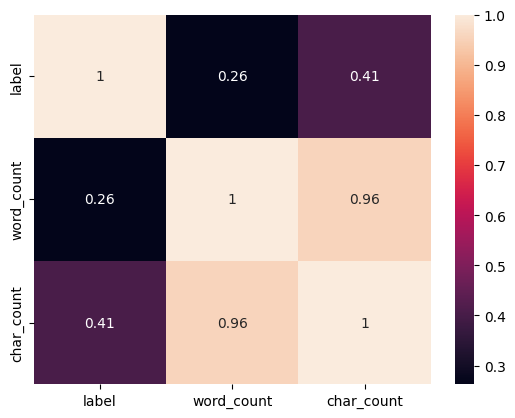

In [26]:
#creating a coefficient matrix to see the correlation between the features
corr_matrix = email_df.corr()
sns.heatmap(corr_matrix,annot=True)

we can see that the most correlation is with the characters of used in a mail so we shal be using this feature in our model training

#### cleaning the mail text using NLP

In [27]:
from nltk.corpus import stopwords       #removes the stop words
from nltk.stem import PorterStemmer     #removes the suffixes from the words
from nltk.stem import WordNetLemmatizer #converts the words into their base form
from nltk.tokenize import word_tokenize #tokenizes the words
from string import punctuation          #removes the punctuations

In [89]:
#creating a function that will apply data preprocessing on the mail column
def stem_preprocess(text):
    text = text.lower()     #converts the text into lowercase
    text = "".join([char for char in text if char not in punctuation])       #removes the punctuations from the text
    text = ''.join(c for c in text if not c.isdigit())       #removes the numbers from the text
    text = word_tokenize(text)      #tokenizes the words
    text = [word for word in text if word not in stopwords.words('english')]     #removes the stop words
    stemmer = PorterStemmer()       #creating an object of the PorterStemmer class
    text = [stemmer.stem(word) for word in text]       #removes the suffixes from the words

    return " ".join(text)       #joins the words back into a sentence
    
def lem_preprocess(text):
    text = text.lower()     #converts the text into lowercase
    text = "".join([char for char in text if char not in punctuation])       #removes the punctuations from the text
    text = ''.join(c for c in text if not c.isdigit())       #removes the numbers from the text
    text = word_tokenize(text)      #tokenizes the words
    text = [word for word in text if word not in stopwords.words('english')]     #removes the stop words
    lemmatizer = WordNetLemmatizer()        #creating an object of the WordNetLemmatizer class
    text = [lemmatizer.lemmatize(word) for word in text]       #converts the words into their base form
    
    return " ".join(text)       #joins the words back into a sentence   

In [90]:
x="This is, a boy who is learning ML algo"
print(stem_preprocess(x),'|' , lem_preprocess(x))

boy learn ml algo | boy learning ml algo


In [41]:
#applying the function on the mail column
email_df['stemmed_mail'] = email_df['mail'].apply(lambda x: stem_preprocess(x))
email_df['lemmatized_mail'] = email_df['mail'].apply(lambda x: lem_preprocess(x))

In [42]:
email_df.head()

,label,mail,word_count,char_count,stemmed_mail,lemmatized_mail
0,0,"Go until jurong point, crazy.. Available only ...",24,92,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,24,ok lar joke wif u oni,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,128,free entri wkli comp win fa cup final tkt st m...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,13,39,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,49,nah dont think goe usf live around though,nah dont think go usf life around though


In [44]:
email_df[email_df['label']==0].head()

,label,mail,word_count,char_count,stemmed_mail,lemmatized_mail
0,0,"Go until jurong point, crazy.. Available only ...",24,92,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,24,ok lar joke wif u oni,ok lar joking wif u oni
3,0,U dun say so early hor... U c already then say...,13,39,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,49,nah dont think goe usf live around though,nah dont think go usf life around though
6,0,Even my brother is not like to speak with me. ...,18,62,even brother like speak treat like aid patent,even brother like speak treat like aid patent


In [53]:
#finding the top 15 words used in spam messages
spam_words = email_df[email_df['label']==1]['stemmed_mail'].str.split(expand=True).stack().value_counts()[:15]
spam_words

call      323
å£        222
free      190
txt       137
u         130
text      122
ur        119
mobil     115
stop      106
repli     101
claim      98
prize      82
get        73
new        64
servic     64
dtype: int64

In [54]:
#finding the top 15 words used in ham messages
ham_words = email_df[email_df['label']==0]['stemmed_mail'].str.split(expand=True).stack().value_counts()[:15]
ham_words

u       890
im      437
go      403
get     354
come    272
ltgt    254
ok      246
dont    242
got     238
like    232
know    232
call    232
time    212
love    211
want    208
dtype: int64

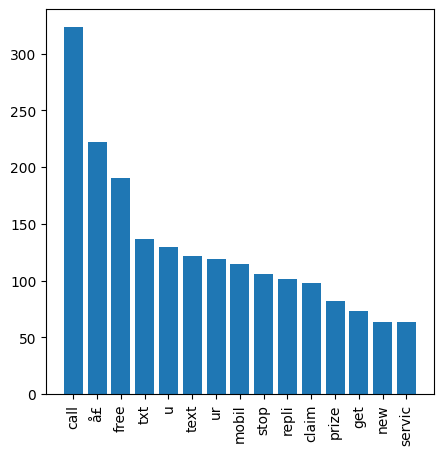

In [57]:
#create a barplot for the spam words
plt.figure(figsize=(5,5))
plt.bar(spam_words.index,spam_words.values)
plt.xticks(rotation=90)
plt.show()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB , BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier 

In [59]:
cv = CountVectorizer()
X_cv = cv.fit_transform(email_df['stemmed_mail'])
y_cv = email_df['label']

In [82]:
#creating a model using MultinomialNB
model_mnb = MultinomialNB()
x_train , x_test , y_train , y_test = train_test_split(X_cv , y_cv , test_size=0.3 , random_state=21)
model_mnb.fit(x_train , y_train)
y_pred = model_mnb.predict(x_test)
print("Accuracy Score : " , accuracy_score(y_test , y_pred))
print("Confusion Matrix : \n" , confusion_matrix(y_test , y_pred))
print("Classification Report : \n" , classification_report(y_test , y_pred))
print("F1 Score : " , f1_score(y_test , y_pred))


Accuracy Score :  0.9729206963249516
Confusion Matrix : 
 [[1331   27]
 [  15  178]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1358
           1       0.87      0.92      0.89       193

    accuracy                           0.97      1551
   macro avg       0.93      0.95      0.94      1551
weighted avg       0.97      0.97      0.97      1551

F1 Score :  0.8944723618090452


In [84]:
#pickle the multinomial model
import pickle
pickle.dump(model_mnb,open('model_mnb.pkl','wb'))

In [66]:
#creating model with bernoulli naive bayes
model_bnb = BernoulliNB()
model_bnb.fit(x_train , y_train)
y_pred_bnb = model_bnb.predict(x_test)

print("Accuracy Score : " , accuracy_score(y_test , y_pred_bnb))
print("Confusion Matrix : \n" , confusion_matrix(y_test , y_pred_bnb))
print("Classification Report : \n" , classification_report(y_test , y_pred_bnb))
print("F1 Score : " , f1_score(y_test , y_pred_bnb))

Accuracy Score :  0.9626047711154094
Confusion Matrix : 
 [[1352    6]
 [  52  141]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1358
           1       0.96      0.73      0.83       193

    accuracy                           0.96      1551
   macro avg       0.96      0.86      0.90      1551
weighted avg       0.96      0.96      0.96      1551

F1 Score :  0.8294117647058824


we can see the precision for the spam messages (1) is 0.96 which is high


In [91]:
pickle.dump(model_bnb,open('model_bnb.pkl','wb'))

In [67]:
#creaing model with gaussian naive bayes
model_gnb = GaussianNB()
model_gnb.fit(x_train.toarray() , y_train)
y_pred_gnb = model_gnb.predict(x_test.toarray())

print("Accuracy Score : " , accuracy_score(y_test , y_pred_gnb))
print("Confusion Matrix : \n" , confusion_matrix(y_test , y_pred_gnb))
print("Classification Report : \n" , classification_report(y_test , y_pred_gnb))
print("F1 Score : " , f1_score(y_test , y_pred_gnb))

Accuracy Score :  0.8620245003223727
Confusion Matrix : 
 [[1176  182]
 [  32  161]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      1358
           1       0.47      0.83      0.60       193

    accuracy                           0.86      1551
   macro avg       0.72      0.85      0.76      1551
weighted avg       0.91      0.86      0.88      1551

F1 Score :  0.6007462686567164


In [71]:
#creating model with decision tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train , y_train)
y_pred_dt = model_dt.predict(x_test)

print("Accuracy Score : " , accuracy_score(y_test , y_pred_dt))
print("Confusion Matrix : \n" , confusion_matrix(y_test , y_pred_dt))
print("Classification Report : \n" , classification_report(y_test , y_pred_dt))
print("F1 Score : " , f1_score(y_test , y_pred_dt))

Accuracy Score :  0.9580915538362347
Confusion Matrix : 
 [[1336   22]
 [  43  150]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1358
           1       0.87      0.78      0.82       193

    accuracy                           0.96      1551
   macro avg       0.92      0.88      0.90      1551
weighted avg       0.96      0.96      0.96      1551

F1 Score :  0.8219178082191781


In [72]:
#creating model with extra tree classifier
model_et = ExtraTreeClassifier()
model_et.fit(x_train , y_train)
y_pred_et = model_et.predict(x_test)

print("Accuracy Score : " , accuracy_score(y_test , y_pred_et))
print("Confusion Matrix : \n" , confusion_matrix(y_test , y_pred_et))
print("Classification Report : \n" , classification_report(y_test , y_pred_et))
print("F1 Score : " , f1_score(y_test , y_pred_et))

Accuracy Score :  0.9529335912314636
Confusion Matrix : 
 [[1341   17]
 [  56  137]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1358
           1       0.89      0.71      0.79       193

    accuracy                           0.95      1551
   macro avg       0.92      0.85      0.88      1551
weighted avg       0.95      0.95      0.95      1551

F1 Score :  0.7896253602305476


In [73]:
#using the multinomial naive bayes model to predict the spam and ham messages
def predict_spam_ham(model , vectorizer , message):
    message = vectorizer.transform([message])
    prediction = model.predict(message)
    if prediction == 1:
        print("The message is a SPAM")
    else:
        print("The message is HAM")


## Testing the multinomial model

In [79]:
my_test = stem_preprocess("Congratulations! You have won a lottery ticket worth $1 Million. To claim, call on 446677")
my_test

'congratul lotteri ticket worth million claim call'

In [86]:
#load the model_mnb.pkl file and make prediction 
model = pickle.load(open('model_mnb.pkl','rb'))
predict_spam_ham(model , cv , my_test)

The message is a SPAM


In [94]:
test2="Darla Eliza just posted an exclusive PPV for you! Click HERE to view. This is only accessible for subscribers, and helps support Darla Eliza to continue creating content for you. Thank you!"
predict_spam_ham(model , cv , test2)

The message is a SPAM


## Testing the baysian model

In [92]:
MODEL_BNB = pickle.load(open('model_bnb.pkl','rb'))
predict_spam_ham(MODEL_BNB , cv , my_test)

The message is HAM


In [93]:
predict_spam_ham(MODEL_BNB , cv , stem_preprocess("Wow! You have won a trip to miami. To claim, call on 446677"))

The message is HAM


### clearly the multinomial model works better
in conclusion, this model is trained on the most common spam and not spam emails. Different users can have different preferences as to what they want to call a piece of text as spam. 
e.g) A fast food restaurant might send their monthly sale advertisement to me as a email which i would consider as spam, however the same company's mail of my order details will not be cosnidered as spam by me